In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset=torchvision.datasets.CIFAR10(root='.\data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes=('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


tensor([5, 9, 2, 5])


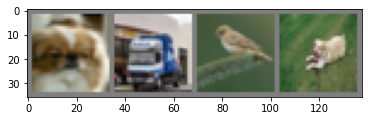

  dog truck  bird   dog


In [3]:
def show(img):
    img=img/2+0.5
    nim=img.numpy()
    plt.imshow(np.transpose(nim,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

show(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    

In [4]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=torch.sigmoid(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()    

In [5]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [6]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
criterion=nn.CrossEntropyLoss()

In [7]:
for epoch in range(5):
    
    running_loss=0.2
    for i,data in enumerate(trainloader,0):
        inputs,label=data
        optimizer.zero_grad()
        output=net(inputs)
        loss=criterion(output,label)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if i%2000==1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')            
        

[1,  2000] loss: 2.314
[1,  4000] loss: 2.313
[1,  6000] loss: 2.241
[1,  8000] loss: 1.975
[1, 10000] loss: 1.757
[1, 12000] loss: 1.630
[2,  2000] loss: 1.563
[2,  4000] loss: 1.504
[2,  6000] loss: 1.480
[2,  8000] loss: 1.437
[2, 10000] loss: 1.394
[2, 12000] loss: 1.391
[3,  2000] loss: 1.334
[3,  4000] loss: 1.303
[3,  6000] loss: 1.281
[3,  8000] loss: 1.260
[3, 10000] loss: 1.232
[3, 12000] loss: 1.222
[4,  2000] loss: 1.157
[4,  4000] loss: 1.144
[4,  6000] loss: 1.155
[4,  8000] loss: 1.124
[4, 10000] loss: 1.146
[4, 12000] loss: 1.152
[5,  2000] loss: 1.050
[5,  4000] loss: 1.059
[5,  6000] loss: 1.058
[5,  8000] loss: 1.063
[5, 10000] loss: 1.066
[5, 12000] loss: 1.073
Finished Training


In [8]:
outputs=net(images)

In [9]:
pred=torch.max(outputs,1)[1]
print(outputs)
print('Predicted: ', ' '.join('%5s' % classes[pred[j]]
                              for j in range(4)))

tensor([[-2.4204, -2.7857,  0.8409,  1.9693,  1.9035,  3.3931,  0.6184,  2.6157,
         -4.0271, -1.4476],
        [ 0.0321,  4.0147, -0.0549, -0.6292, -1.2698, -1.4133, -1.6470, -0.6739,
         -0.7365,  2.5677],
        [-0.5197, -2.7135,  3.2539,  1.6637,  2.0125,  0.6100,  2.4349, -1.7232,
         -0.8126, -3.9827],
        [-1.2920, -1.4645,  1.9831,  2.3068,  1.8198,  0.8869,  1.9160, -0.7673,
         -2.8547, -2.1476]], grad_fn=<AddmmBackward>)
Predicted:    dog   car  bird   cat


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 73 %
Accuracy of  bird : 57 %
Accuracy of   cat : 36 %
Accuracy of  deer : 51 %
Accuracy of   dog : 66 %
Accuracy of  frog : 66 %
Accuracy of horse : 65 %
Accuracy of  ship : 59 %
Accuracy of truck : 61 %


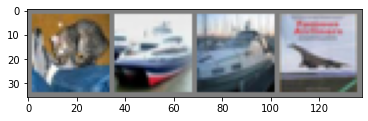

Predicted:  dog   dog  deer horse
Actual   :  cat  ship  ship plane


In [19]:
for data in testloader:
    
    images, labels=data
    output_im=net(images)
    _, predicted = torch.max(outputs, 1)
    
    show(torchvision.utils.make_grid(images))
    
    print("Predicted:"+' '.join('%5s' % classes[predicted[j]] for j in range(4)))    
    print("Actual   :"+' '.join('%5s' % classes[labels[j]] for j in range(4)))
    
    break